# **Emerging Methods for Early Detection of Forest Fires**
**Team ID: PNT2022TMID21021**



# **Image Pre-Proecessing**

**1.Importing the ImageDataGenerator Library**



In [4]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, SeparableConv2D, Activation, BatchNormalization
import matplotlib.pyplot as plt
import time
import os
import tensorflow as tf

**2.Define parameters for ImageDataGenerator Class**

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

**3.Applying ImageDataGenerator Functionality to Trainset and Testset**


a. for dataset

In [6]:
x_dataset =train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Dataset/Dataset",target_size = (128,128), class_mode = "binary",batch_size = 32)


Found 557 images belonging to 2 classes.


b. for trainset

In [7]:
x_train =train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Dataset/Dataset/train_set",target_size = (128,128), class_mode = "binary",batch_size = 32)

Found 436 images belonging to 2 classes.


c. for testset

In [8]:
x_test =test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM/Dataset/Dataset/test_set",target_size = (128,128), class_mode = "binary",batch_size = 32)

Found 121 images belonging to 2 classes.


In [9]:
x_train.class_indices


{'forest': 0, 'with fire': 1}

# **Model Building**

**1. Importing Model Building libraries**

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

**2. Initializing the model**

In [11]:
model=Sequential()

**3. Adding CNN layers**

*a. Adding Convolution layers*

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

*b. Adding pooling layer*

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

*c. Adding Flatten layer*

In [15]:
model.add(Flatten())

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


**4. Adding Dense layers**

*a. Adding hidden layers*

In [17]:
model.add(Dense(150,activation='relu'))

*b. Adding Output layer*

In [18]:
model.add(Dense(1,activation='sigmoid'))

**5. Configuring the Learning Process**



In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**6. Training the model**

In [20]:
#training using fit method
r=model.fit_generator(x_train,steps_per_epoch=14, epochs=10,validation_data=x_test, validation_steps=2)

Epoch 1/10
14/14 [==============================] - 155s 11s/step - loss: 2.1442 - accuracy: 0.5642 - val_loss: 0.1403 - val_accuracy: 0.9375
Epoch 2/10
14/14 [==============================] - 29s 2s/step - loss: 0.5166 - accuracy: 0.8073 - val_loss: 0.1329 - val_accuracy: 0.9219
Epoch 3/10
14/14 [==============================] - 25s 2s/step - loss: 0.2756 - accuracy: 0.8739 - val_loss: 0.1499 - val_accuracy: 0.9219
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.2098 - accuracy: 0.9083 - val_loss: 0.1603 - val_accuracy: 0.9375
Epoch 5/10
14/14 [==============================] - 23s 2s/step - loss: 0.1880 - accuracy: 0.9243 - val_loss: 0.1466 - val_accuracy: 0.9375
Epoch 6/10
14/14 [==============================] - 25s 2s/step - loss: 0.2142 - accuracy: 0.9128 - val_loss: 0.0867 - val_accuracy: 0.9531
Epoch 7/10
14/14 [==============================] - 24s 2s/step - loss: 0.1931 - accuracy: 0.9083 - val_loss: 0.0359 - val_accuracy: 1.0000
Epoch 8/10
14/14 [

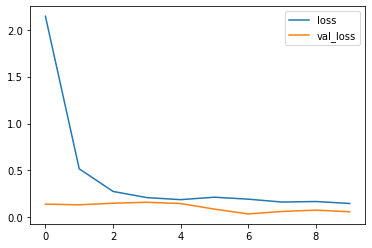

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

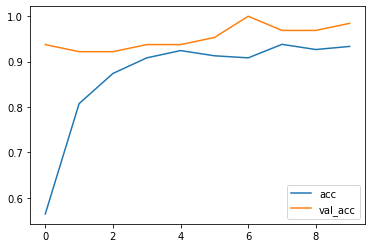

In [22]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

**7. Save the model**

In [24]:
model.save("/content/forest_model.h5")

**8. Test the model**

In [26]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import cv2

In [28]:
model=load_model('/content/forest_model.h5')

In [30]:
img=image.load_img('/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/Bandipur_fires_2019.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

# **Predictions**

In [31]:
pred=model.predict(x)

1/1 [==============================] - 0s 214ms/step


In [32]:
pred

array([[1.]], dtype=float32)

In [34]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(128,128))
  plt.imshow(img1)
  y=image.img_to_array(img1)
  x=np.expand_dims(y,axis=0)
  ctr=model.predict(x)
  print(ctr)
  if ctr==0:
    plt.xlabel(" No Fire detected",fontsize=30)
  elif ctr==1:
    plt.xlabel("Fire detected",fontsize=30)

1/1 [==============================] - 0s 50ms/step
[[0.]]


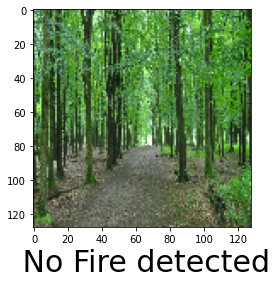

In [35]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/forest/1170x500_Ireland_web.jpg")

1/1 [==============================] - 0s 25ms/step
[[0.]]


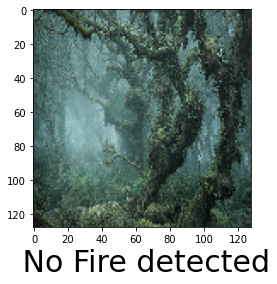

In [36]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg")

1/1 [==============================] - 0s 41ms/step
[[0.]]


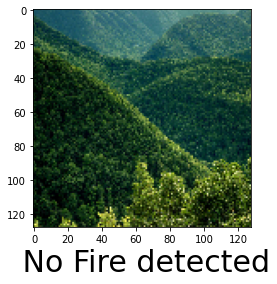

In [37]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/forest/2017_10_12_09_01_56.jpg")

1/1 [==============================] - 0s 26ms/step
[[1.]]


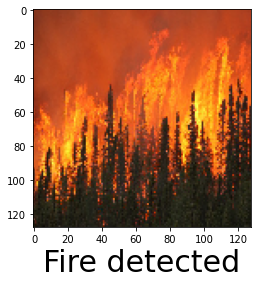

In [38]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/Forest_fire_MNRF_esize_IMG_6743.jpg")

1/1 [==============================] - 0s 52ms/step
[[1.]]


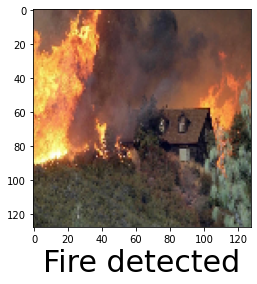

In [39]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/How_to_Protect_Your_Home_From_Forest_Fire_1024x588.jpg")

1/1 [==============================] - 0s 32ms/step
[[1.]]


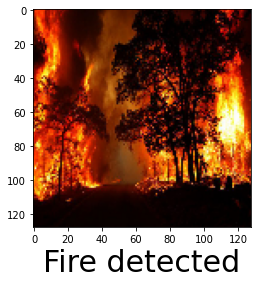

In [40]:
predictImage("/content/drive/MyDrive/IBM/Dataset/Dataset/test_set/with fire/uttarakhand_forest_fire_750x500.jpg")

# **Sending Alert message**

In [41]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [42]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=e3df54c00005676fdc70b065440e346befa20b3fefb610921d4fb87c4dc9a602
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [43]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
#import opencv librariy
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#imort playsound package
from playsound import playsound

In [45]:
#load the saved model
model = load_model(r'/content/forest_model.h5')
#define video
video = cv2.VideoCapture('/content/drive/MyDrive/forest fire.mp4')
#define the features
name = ['forest','with forest']

In [46]:
from twilio.rest import Client 
 
account_sid = 'AC9f6fc46b088bc81bbeef4a802cd06864' 
auth_token = '29f7d63c9d6ce55afbecb683a85072c2' 
client = Client(account_sid, auth_token)
 
 
message = client.messages.create(  
                              messaging_service_sid='MG55c5ca2c99b3b2f04047a3b7fe504a56', 
                              body='Forest fire is detected, stay alert!',      
                              to='+918610271176' 
                          ) 
 
print(message.sid)
print("Fire detected")
print("SMS Sent!")

SM2fd7adfb9f09b3ee931d92d2d477ce05
Fire detected
SMS Sent!
